In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load train file 
train=pd.read_csv('train.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# training data have 1 traget feature and all independent feature  
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


<AxesSubplot:>

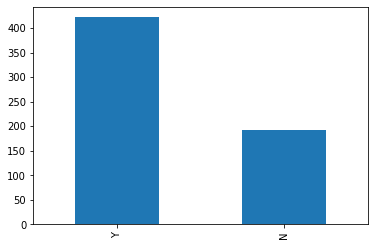

In [10]:
print(train['Loan_Status'].value_counts(normalize=True))
train['Loan_Status'].value_counts().plot.bar()

## loan are approved of approx 69 perecent people

### Now, let's visualize each variable separately. Different types of variables are Categorical, ordinal, and  numerical.

(1) Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

(2) Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

(3)Numerical features: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)

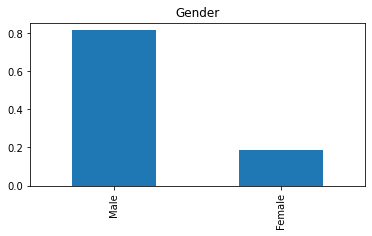

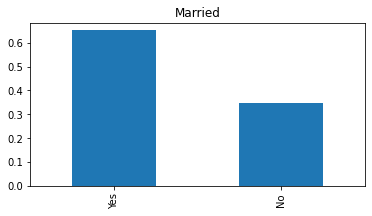

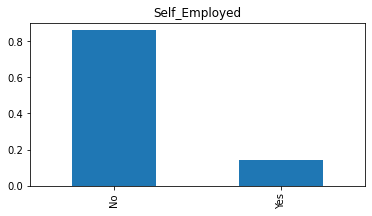

<AxesSubplot:title={'center':'Credit_History'}>

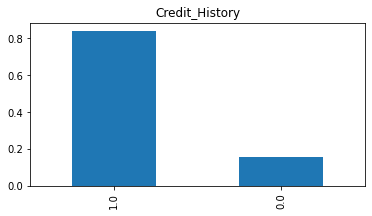

In [11]:
## categorical feature 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(6,3),title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(figsize=(6,3),title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(6,3),title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(6,3),title='Credit_History')



observation:

(1) 80% of applicants in the dataset are male.

(2) Around 65% of the applicants in the dataset are married.

(3) Around 15% of applicants in the dataset are self-employed.

(4) Around 85% of applicants have repaid their doubts.

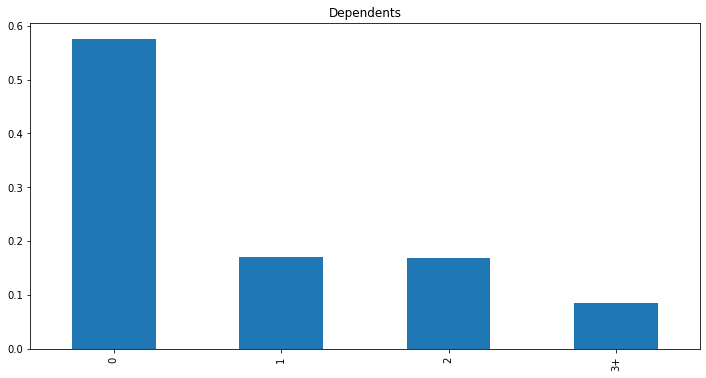

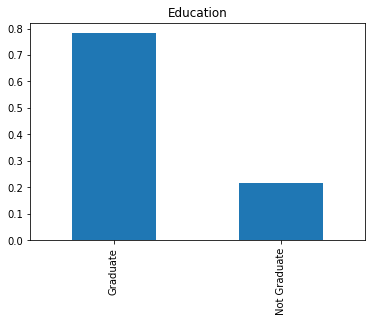

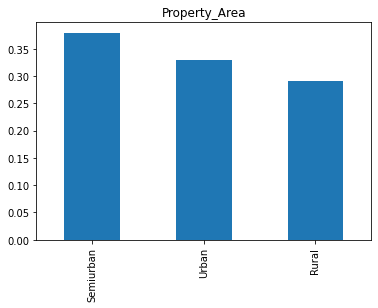

In [12]:
## ordinal
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,6), title='Dependents')

plt.show()


train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.show()

train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Observation:
(1)Most of the applicants don't have any dependents.

(2)Around 80% of the applicants are Graduate.

(3)Most of the applicants are from the Semiurban area.

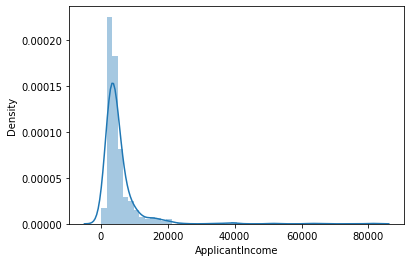

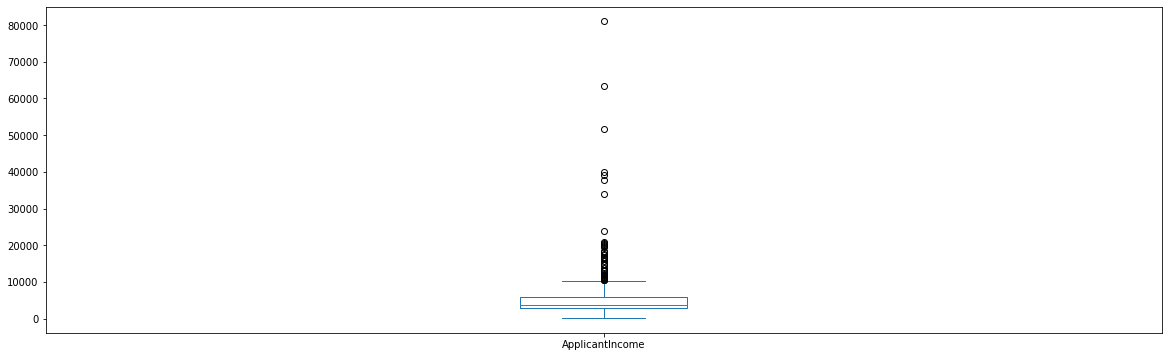

In [13]:
## Numerical features
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(20,6))
plt.show()

Observation: 
(1) most of the data in the distribution of applicant income are towards the left which means it is not normally distributed

(2) The boxplot conform  the presence of a lot of outliers values

Text(0.5, 0.98, '')

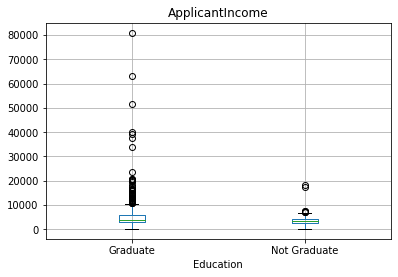

In [14]:
# Applicant_income by education
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

Obesrvation: higher number of graduate with very high incomes which are appering to be outlier

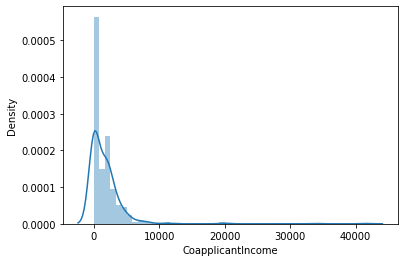

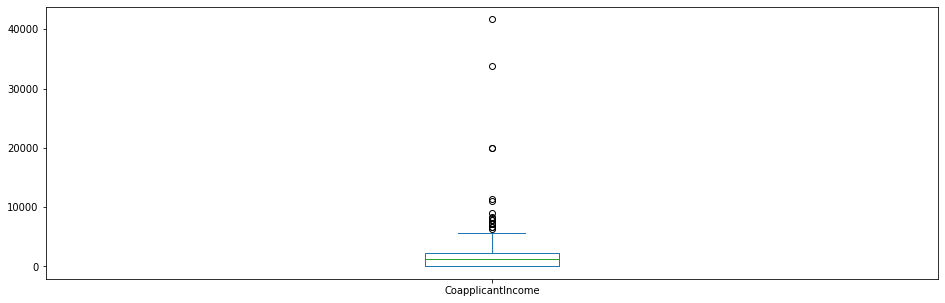

In [15]:
## co_uplicant income
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Obesrvation: 
We see a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

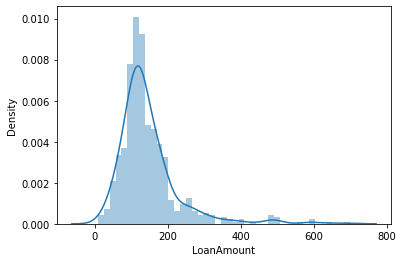

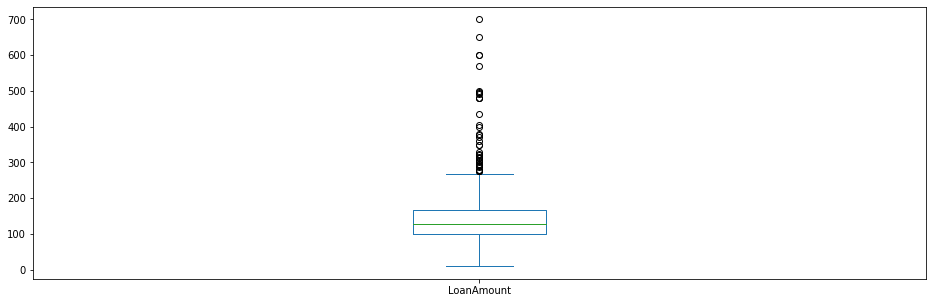

In [16]:
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

## following factor are efect on loan approval

(1) Applicants with high incomes should have more chances of loan approval.

(2) Applicants who have re_paid their previous loan should have higher chances of loan approval.

(3)Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.

(4)Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

# independent and traget variable
We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

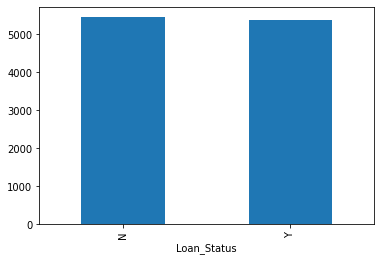

In [17]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [18]:
# categorical into numerical
train['Dependents'].replace('3+', 3, inplace=True)
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [19]:
# convert categorical data into numerical data 
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

<AxesSubplot:>

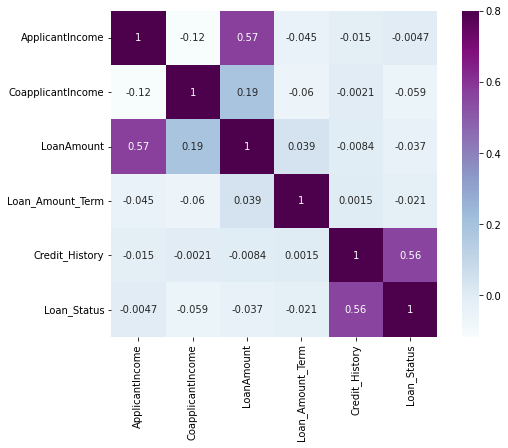

In [20]:
matrix =train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

In [21]:
# check missig value
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

(1) categorical variable missing value fill with mode

(2)and numerical variable fill with mean and median

In [22]:
## fill all missing value

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

train['Married'].fillna(train['Married'].mode()[0], inplace=True)

train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [23]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [24]:
# drop loan id 
train.drop('Loan_ID',axis=1 ,inplace=True)

In [25]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [26]:
train['LoanAmount'].value_counts().mean()

2.916256157635468

In [27]:
train['LoanAmount'].value_counts().median()

2.0

In [28]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True)

In [29]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
# add applicant income and co_applicant income
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [31]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [32]:
train.drop(['ApplicantIncome','CoapplicantIncome'],axis=1, inplace=True)

In [33]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0


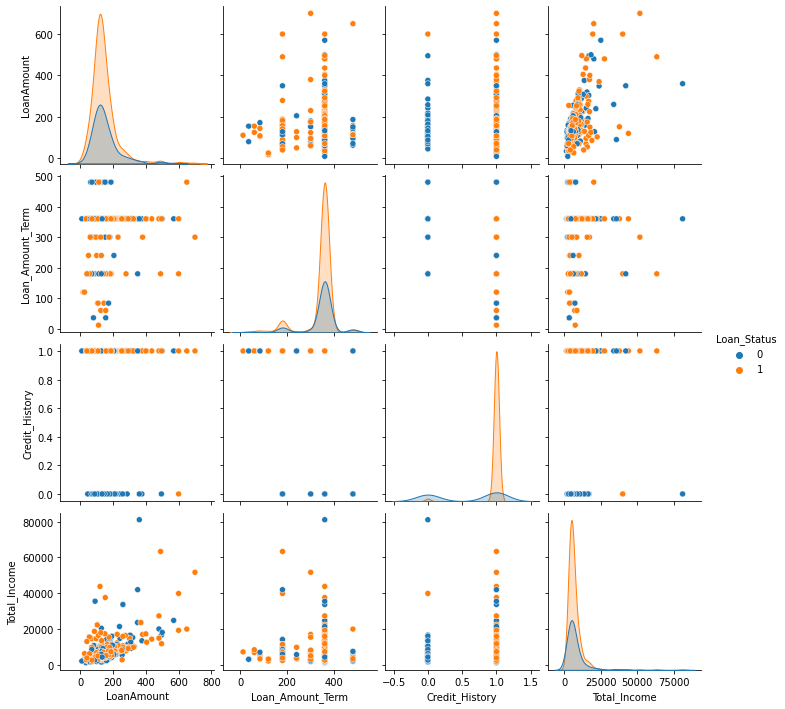

In [34]:
sns.pairplot(data=train, hue="Loan_Status" )

<AxesSubplot:>

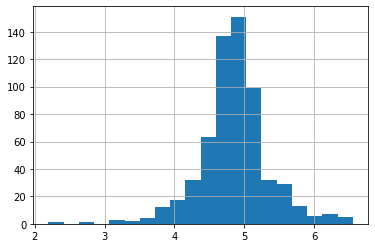

In [35]:
## use log transformation to reduce outlier and normalize 

train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

now the distrubation looks much closer to normal distrubation

In [36]:
x=train.drop('Loan_Status',axis=1) # training variable
y=train.Loan_Status # traget variable

In [37]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)

In [38]:
x.head(5)

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,128.0,360.0,1.0,5849.0,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,128.0,360.0,1.0,6091.0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,66.0,360.0,1.0,3000.0,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,120.0,360.0,1.0,4941.0,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,141.0,360.0,1.0,6000.0,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [39]:
y.shape

(614,)

In [40]:
x.shape

(614, 20)

In [41]:
## use train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [42]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression()

In [43]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1], dtype=int64)

In [44]:
accuracy_score(y_test,y_pred)

0.7980295566502463

Observation: So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

In [72]:
# using Knn to check accuracy score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [73]:
# feature scaling

sc=StandardScaler()

x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [74]:
import math
math.sqrt(len(y_test))

14.247806848775006

In [75]:
classifier = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')
classifier.fit(x_train,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [76]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [77]:
# i will use confusion matrix to check accuracy

cm=confusion_matrix(y_test,y_pred)
cm

array([[ 13,  59],
       [  1, 130]], dtype=int64)

In [78]:
# now i will check f1 score
f1_score(y_test,y_pred)

0.8124999999999999

In [80]:
accuracy_score(y_test,y_pred)

0.7044334975369458

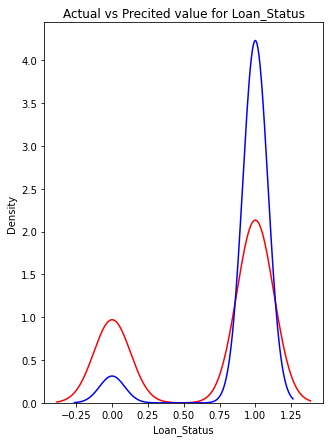

In [81]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(train['Loan_Status'], hist=False, color="r", label="Actual Value")

sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for Loan_Status')
plt.show()
plt.close()

In [82]:
# use decision tree to check accur

from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier(criterion='entropy', random_state=0) 

classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [83]:
y_pred= classifier.predict(x_test)  
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1], dtype=int64)

In [84]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[ 40,  32],
       [ 22, 109]], dtype=int64)

In [85]:
accuracy_score(y_test,y_pred)

0.7339901477832512

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
# use random forest 

clf = RandomForestClassifier(n_estimators =10000, max_depth = 4, max_features = 5, bootstrap = True, random_state =0)

In [66]:
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10000,
                       random_state=0)

In [67]:
y_pred=clf.predict(x_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1], dtype=int64)

In [62]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[ 34,  38],
       [  2, 129]], dtype=int64)

In [63]:
f1_score(y_test,y_pred)

0.8657718120805369

In [68]:
accuracy_score(y_test,y_pred)

0.8029556650246306